#Visualização de Grafos

Este notebook ilustra conceitos de visualização de grafos usando JGraphT, versão **Python bindings**, cuja documentação encontra-se no link abaixo:

https://python-jgrapht.readthedocs.io/en/jgrapht-1.5.0.3/

Referências para os ambientes de teste dos pacotes adicionais utlizados seguem abaixo. Lembrando que a consulta a estas referências não é necessária, ficando a critério de quem quiser conhecer as implementações e seus testes em mais detalhes.

- drawutil - https://colab.research.google.com/drive/12JUu5AjfF65pCNAfa3IrV56OhDWmbcvV?usp=sharing

*Atenção:* Os blocos de código neste roteiro, especialmente referentes a instalação e importação e definições auxiliares, devem ser executados na sequência em que são apresentados abaixo, antes de cada uso deste notebook, a fim de garantir que as definições necessárias em cada trecho foram devidamente importadas/criadas.

# Instalação e Importação de Pacotes e Arquivos


Python bindings pode ser instalado usando pip no escopo de qualquer interpretador python.
Abaixo, temos a instalação para este notebook e a importação de bibliotecas e arquivos que usaremos a seguir.

In [ ]:
# Instalando a JgraphT para uso neste notebook
!pip install jgrapht

# Importando a JgraphT
import jgrapht

# Importanto funções para print de vértices e arestas
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/python/drawutil.py
from drawutil import draw_graph

# Download de arquivos de grafos usados neste notebook

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 8.3 MB/s 
--2022-10-07 11:15:48--  https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/python/drawutil.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6783 (6.6K) [text/plain]
Saving to: ‘drawutil.py’

drawutil.py         100%[===================>]   6.62K  --.-KB/s    in 0s      

2022-10-07 11:15:49 (57.3 MB/s) - ‘drawutil.py’ saved [6783/6783]



# Visualização Gráfica

Para construir uma visualização gráfica para um grafo, utilizamos a função **draw_graph** do pacote *drawutil.py* que está anexado neste notebook. Esta função utiliza o pacote [Draw Matplotlib](https://python-jgrapht.readthedocs.io/en/jgrapht-1.5.0.3/api/drawing/draw_matplotlib.html). Por questão de simplicidade, não apresentaremos os detalhes de implementação desta função neste notebook. Mas os interessados podem consultar o arquivo drawutil.py para ver como foi implementada, bem como referência para seu ambiente de teste apresentada na introdução deste notebook.

A função **draw_graph** permite configurar diferentes itens da visualização tais como formato e cores de vértices e labels. Seus diferentes usos serão ilustrados ao longo das aulas quando forem necessários. No exemplo abaixo, apresentamos um uso básico desta função.

*Observação*: o pacote Draw Matplotlib não possibilita a visualização de arestas paralelas ou arestas loop. Assim, o uso de draw_graph é adequado *apenas* para **grafos simples** ou **dígrafos estritos**.

O pacote Draw Matplotlib dispõe de 4 tipos de **layouts** automáticos para organização dos vértices e arestas do grafo na visualização, dentre os que foram estudados na aula de hoje:
- random
- circular
- fruchterman_reingold (force-based)
- fruchterman_reingold_indexed (force-based)

No exemplo abaixo, é possível escolher o layout de visualização através do menu à direita.


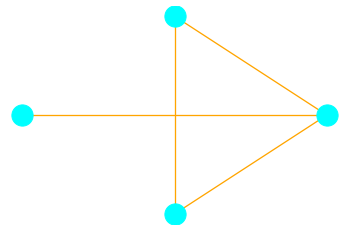

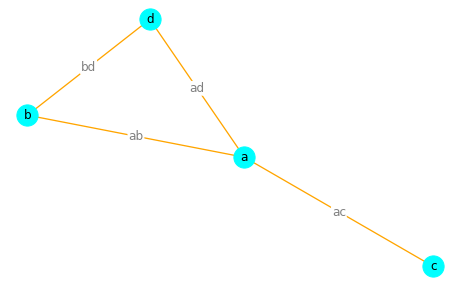

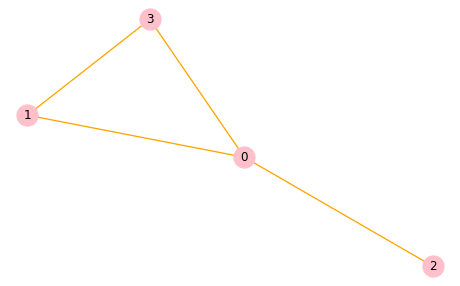

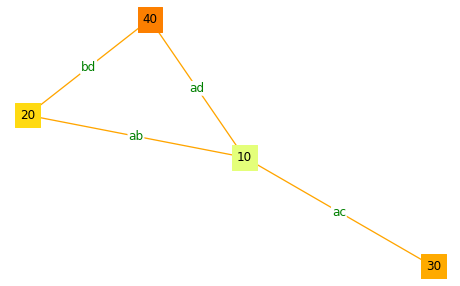

In [ ]:
#@title Layout Gráfico { run: "auto", vertical-output: true }
layout = "fruchterman_reingold" #@param ["random", "circular", "fruchterman_reingold", "fruchterman_reingold_indexed"]

g0 = jgrapht.create_graph(directed=False, weighted=False)
v_g0 = {
    0 : {'label': 'a', 'factor': '10'},
    1 : {'label': 'b', 'factor': '20'},
    2 : {'label': 'c', 'factor': '30'},
    3 : {'label': 'd', 'factor': '40'}
}
e_g0 = {
    0 : {'label' : 'ab'},
    1 : {'label' : 'ac'},
    2 : {'label' : 'ad'},
    3 : {'label' : 'bd'},
}
g0.add_vertices_from([x for x in range(0,4)])
g0.add_edge(0,1,edge=0)
g0.add_edge(0,2,edge=1)
g0.add_edge(0,3,edge=2)
g0.add_edge(1,3,edge=3)

# Visualização utilizando labels de vértices e arestas
draw_graph(g0)
draw_graph(g0,layout=layout,
           vlabel='label',v_attrs=v_g0,
           elabel='label',e_attrs=e_g0)
# Visualização utilizando os ids dos vértices
draw_graph(g0,layout=layout,vertexid_aslabel=True,
           vertex_color="pink")
# Visualação usando o atributo 'factor' para os vértices e mapa de cores
import matplotlib.pyplot as plt
draw_graph(g0,layout=layout,
           vlabel='factor',v_attrs=v_g0,elabel='label',
           e_attrs=e_g0,
           vmap=plt.cm.Wistia,vertex_color=range(4),
           vsize=600,edge_font_color="green",vshape=",")


# Destacando grupos de vértices ou arestas e adicionando legenda aos grupos

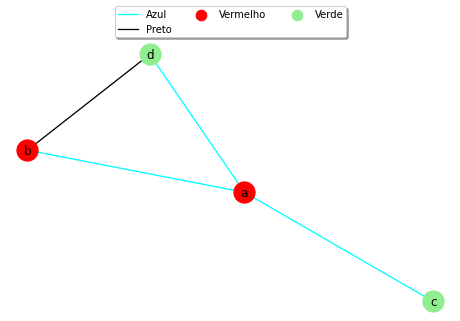

In [ ]:
draw_graph(g0,layout,vlabel='label',v_attrs=v_g0,
           vset=[[0,1],[2,3]],vsetcolor=['red','lightgreen'],vsetlabel=['Vermelho','Verde'],
           eset=[[0,1,2],[3]],esetcolor=['cyan','black'],esetlabel=['Azul','Preto'])

# Exercício

Desenhe o grafo g0 criado anteriormente, destacando a cor de um vértice *v* como vermelho, a dos seus vizinhos como azul e os demais vértices como laranja. A fonte dos vértices deve ter cor branca.

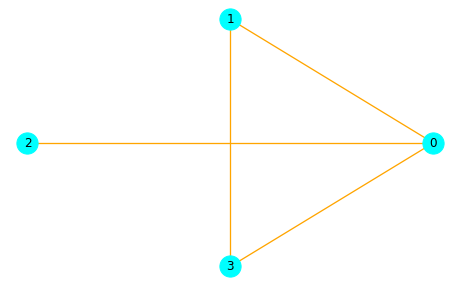

In [ ]:
v = 1
vizinhos_v = [g0.opposite(e,v) for e in g0.edges_of(v)]
draw_graph(g0, layout = "fruchterman_reingold", vertexid_aslabel=True)